<a href="https://www.kaggle.com/code/devashishhsingh/eda-of-2019-indian-general-election-poll?scriptVersionId=138408367" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Candidates of India General Election 2019

With over 600 Million voters voting for **8500+ candidates** across 543 constituencies, the general elections in the world's largest democracy are a potential goldmine of data.
While there are existing separate datasets about the votes each candidate received and the personal information of each candidate, there was no comprehensive dataset that included both these information. Thus, this dataset will provide more usability than most existing datasets in this domain.


There are Particularly Two main task we can do with this given data.
1. SHEET1 : **Exploratory Data Analytics** - to Visualize the result and find some correlation between dataset.
2. SHEET2 : **Predict the change of winning of a candidate ** using Machine learning algo.

# **Importing necessary Libraries**

In [1]:
import numpy as np #For arrays,linear algebra/matrices
import pandas as pd #For datasets,cleaning/exploring
import matplotlib #For creating static interactive visulization
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns #For data visulization and ML task
import warnings #For displaying warning
warnings.filterwarnings('ignore') #Ignore - never dislplay the warnings which match
import geopandas as gpd
import random
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected = True)
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15,10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
print('Setup complete')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv
/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx
Setup complete


In [2]:
df = pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
df.head(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [3]:
df.shape

(2263, 19)

# Initial Observation :
1. Dataset contain 2263 rows and 19 columns
2. The dataset consist of top 3 candidates from each constituency along with NOTA votes for each consistency
3. Column name "ASSETS" and "LIABILITIES" has contain mix type of dtypes.


# Data Processing
**Data Prepartion and Cleaning**
1. In above data set Column name "Assets" & "Liabilities" we can convert dataset fully into numeric.
2. We can also reprocess the data of col-name "Eduction"
3. We can also count null in the dataset and eliminate or fillup whatever is possible 

In [4]:
df.dtypes

STATE                                         object
CONSTITUENCY                                  object
NAME                                          object
WINNER                                         int64
PARTY                                         object
SYMBOL                                        object
GENDER                                        object
CRIMINAL\nCASES                               object
AGE                                          float64
CATEGORY                                      object
EDUCATION                                     object
ASSETS                                        object
LIABILITIES                                   object
GENERAL\nVOTES                                 int64
POSTAL\nVOTES                                  int64
TOTAL\nVOTES                                   int64
OVER TOTAL ELECTORS \nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    float64
TOTAL ELECTORS                                

In [5]:
#Converting "Object dtype" into "string"

string_col = df.select_dtypes(include = "object").columns
df[string_col] = df[string_col].astype("string")

In [6]:
df.dtypes

STATE                                         string
CONSTITUENCY                                  string
NAME                                          string
WINNER                                         int64
PARTY                                         string
SYMBOL                                        string
GENDER                                        string
CRIMINAL\nCASES                               string
AGE                                          float64
CATEGORY                                      string
EDUCATION                                     string
ASSETS                                        string
LIABILITIES                                   string
GENERAL\nVOTES                                 int64
POSTAL\nVOTES                                  int64
TOTAL\nVOTES                                   int64
OVER TOTAL ELECTORS \nIN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    float64
TOTAL ELECTORS                                

In [7]:
df['ASSETS'][0]

'Rs 30,99,414\n ~ 30 Lacs+'

**Extract the numeric value from the passed strings and return it as float or int.**

In [8]:
def convert(x):
    if str(x)[0] == 'R':
        return float(str(x).split()[1].replace(",",""))
    return 0.0    

**apply() function** - apply takes a function and apploes it to all values of pandas series.
1. **covert_dtype:** Convert dtype as per the function's operation.
2. **args=():** Additional arguments to pass to function insted of series.
3. **Return Types:** Pandas Series after applied function/operation.

In [9]:
df['ASSETS'] = df['ASSETS'].apply(convert)
df['LIABILITIES'] = df['LIABILITIES'].apply(convert)

In [10]:
df.head(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,0.0,0.0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690



 **When the data was analysed later, it was found that the following categories in EDUCATION column would cause some uncertainities in the visualization process.Hence those are updated here itself, for all subsequent DataFrames.**

In [11]:
df['EDUCATION'] = df['EDUCATION'].str.replace('Post Graduate\n', 'Post Graduate')
df['EDUCATION'] = df['EDUCATION'].str.replace('Graduate Professional', 'Graduate\nProfessional')


**Remove unnecessary columns.**

In [12]:
candidate_df=df.drop(['SYMBOL', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
                        'OVER TOTAL ELECTORS \nIN CONSTITUENCY', 'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'], axis=1)


**Rename some of the columns and sort the data with respect to State and Constituency columns**

In [13]:
candidate_df.rename(columns = {"CRIMINAL\nCASES": "CRIMINAL CASES", "TOTAL\nVOTES": "TOTAL VOTES"}, inplace = True)
candidate_df.sort_values(["STATE", "CONSTITUENCY"], inplace = True)

In [14]:
candidate_df.head(3)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0,95308,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate Professional,85140573.0,4633914.0,93901,318471
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0,5341,318471


In [15]:
candidate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263 entries, 105 to 2171
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   string 
 1   CONSTITUENCY    2263 non-null   string 
 2   NAME            2263 non-null   string 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   string 
 5   GENDER          2018 non-null   string 
 6   CRIMINAL CASES  2018 non-null   string 
 7   AGE             2018 non-null   float64
 8   CATEGORY        2018 non-null   string 
 9   EDUCATION       2018 non-null   string 
 10  ASSETS          2263 non-null   float64
 11  LIABILITIES     2263 non-null   float64
 12  TOTAL VOTES     2263 non-null   int64  
 13  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(3), int64(3), string(8)
memory usage: 265.2 KB


In [16]:
candidate_df['CRIMINAL CASES']

105     0
106     1
107     0
108     0
109     0
       ..
2042    5
2168    0
2169    2
2170    0
2171    0
Name: CRIMINAL CASES, Length: 2263, dtype: string

 **We have to convert the data of 'CRIMINAL CASE' columns to numeric type.**

In [17]:
candidate_df['CRIMINAL CASES']= pd.to_numeric(candidate_df ['CRIMINAL CASES'], errors = 'coerce').convert_dtypes()

**Some more editing is done, and only the personal details of non-NOTA candidate is extracted and stored in a new DataFrame candidate_personal_df**

In [18]:
candidate_personal_df = candidate_df[candidate_df.NAME != 'NOTA']
candidate_personal_df.head(3)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0,95308,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate Professional,85140573.0,4633914.0,93901,318471
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0,5341,318471


In [19]:
print(df.shape) #original shape
print(candidate_df.shape) #after removing some columns
print(candidate_personal_df.shape) #after removing some rows(NOTA candidate)

(2263, 19)
(2263, 14)
(2018, 14)


In [20]:
candidate_personal_df.head(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,INC,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0,95308,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,BJP,MALE,1,46.0,GENERAL,Graduate Professional,85140573.0,4633914.0,93901,318471
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,IND,MALE,0,61.0,GENERAL,Post Graduate,19916000.0,1311000.0,5341,318471
108,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,SANJAY MESHACK,0,AAP,MALE,0,49.0,GENERAL,12th Pass,99887782.0,1791076.0,2839,318471
109,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PRAKASH MINJ,0,BSP,MALE,0,43.0,SC,Post Graduate,1250000.0,240000.0,2486,318471


In [21]:
candidate_personal_df.describe()

,WINNER,CRIMINAL CASES,AGE,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
count,2018.000000,1996.0,2018.000000,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03
mean,0.267096,1.46994,52.273538,1.315849e+08,1.973860e+07,2.922954e+05,1.660261e+06
std,0.442553,7.677432,11.869373,4.122697e+08,8.945292e+07,2.555874e+05,3.164246e+05
min,0.000000,0.0,25.000000,0.000000e+00,0.000000e+00,1.342000e+03,5.518900e+04
25%,0.000000,0.0,43.250000,6.272526e+06,0.000000e+00,3.074375e+04,1.530404e+06
50%,0.000000,0.0,52.000000,2.404181e+07,9.039245e+05,2.855250e+05,1.679891e+06
75%,1.000000,1.0,61.000000,9.152498e+07,6.097971e+06,5.076175e+05,1.823404e+06
max,1.000000,240.0,86.000000,8.950179e+09,1.547511e+09,1.068569e+06,3.150313e+06


**winner_df is created which contain only details of wining candidate**

In [22]:
winner_df = candidate_df[candidate_df['WINNER']== 1].sort_values(['STATE','CONSTITUENCY']).reset_index()
winner_df.drop(['index','WINNER'],axis = 1,inplace = True)
winner_df.head()


,STATE,CONSTITUENCY,NAME,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL VOTES,TOTAL ELECTORS
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,INC,MALE,0,52.0,GENERAL,Graduate Professional,132233012.0,80450870.0,95308,318471
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,YSRCP,FEMALE,0,46.0,SC,Graduate,85993362.0,2431407.0,485958,1459556
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,YSRCP,FEMALE,0,52.0,GENERAL,Graduate Professional,91526244.0,11139279.0,586226,1521363
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,YSRCP,MALE,2,48.0,GENERAL,Doctorate,11773091.0,1135547.0,695208,1664160
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,YSRCP,FEMALE,0,26.0,ST,Graduate Professional,141179.0,0.0,562190,1451418


**Number of parties who contested election.**

In [23]:
candidate_df['PARTY'].nunique()

133

**IND - Independent Candidate**  : Number of independent candidate are present their who contested election.


In [24]:
print(candidate_df[candidate_df.PARTY == 'IND'].shape[0])

201


# **Exploratory Analysis and Visulization**

**Seat share**: Here we calculate how many seats were won by each party, and the percentage seat distribution of the house.

In [25]:
all_party_seat = winner_df.PARTY.value_counts().sort_values(ascending = False)
all_party_seat

BJP       300
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BSP        11
BJD        11
TRS         9
LJP         6
SP          5
CPI(M)      5
NCP         5
IND         4
JKN         3
TDP         3
IUML        3
SAD         2
AIMIM       2
ADAL        2
NPEP        1
MNF         1
NDPP        1
AIUDF       1
KEC(M)      1
AAP         1
RLTP        1
SKM         1
RSP         1
VCK         1
AIADMK      1
JD(S)       1
JMM         1
AJSUP       1
NPF         1
Name: PARTY, dtype: Int64

**we can also simplify the output for better visulization**

In [26]:
others = all_party_seat[all_party_seat<10].sum()
seat_distribution = all_party_seat[all_party_seat>=10].append(pd.Series({"others": others}))
seat_distribution

BJP       300
INC        52
DMK        23
YSRCP      22
AITC       22
SHS        18
JD(U)      16
BSP        11
BJD        11
others     64
dtype: Int64

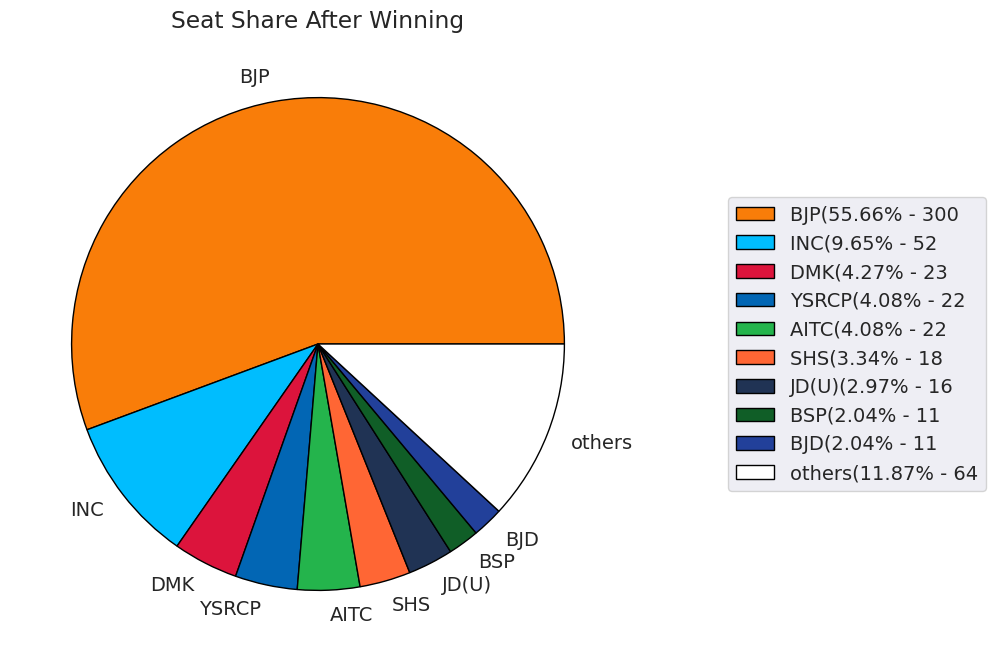

In [27]:
plt.figure(figsize = (10,8))
plt.title('Seat Share After Winning')
plt.pie(seat_distribution,labels = seat_distribution.index,colors = ['#f97d09', '#00bdfe', '#dc143c', '#0266b4', '#24b44c', '#ff6634', 
                                     '#203354', '#105e27', '#22409a', '#FFFFFF'], wedgeprops = {'edgecolor':'black'})
seat_percent = round((seat_distribution/seat_distribution.sum())*100,2)
legend = seat_percent.index +"(" + seat_percent.values.astype(str) + "% - " + seat_distribution.values.astype(str)
plt.legend(legend, loc = "right",bbox_to_anchor = (1.6,0.5));



**Observation:**
1. As we can see,the **BJP** was the single largest party with more than 50% of the seats in the House, with **INC** at a distant second.
2. Other regional parties like **DMK, YSRCP, AITC, BJD** won some seats in their respective states, but no Alliance could pose as an alternative to **BJP**.

**Age :** analysis the number of candidates, both **contestants and winners**, in each age group.

Text(0.77, 0.5, 'mean    54.44\nmin     26.00\nmax     86.00')

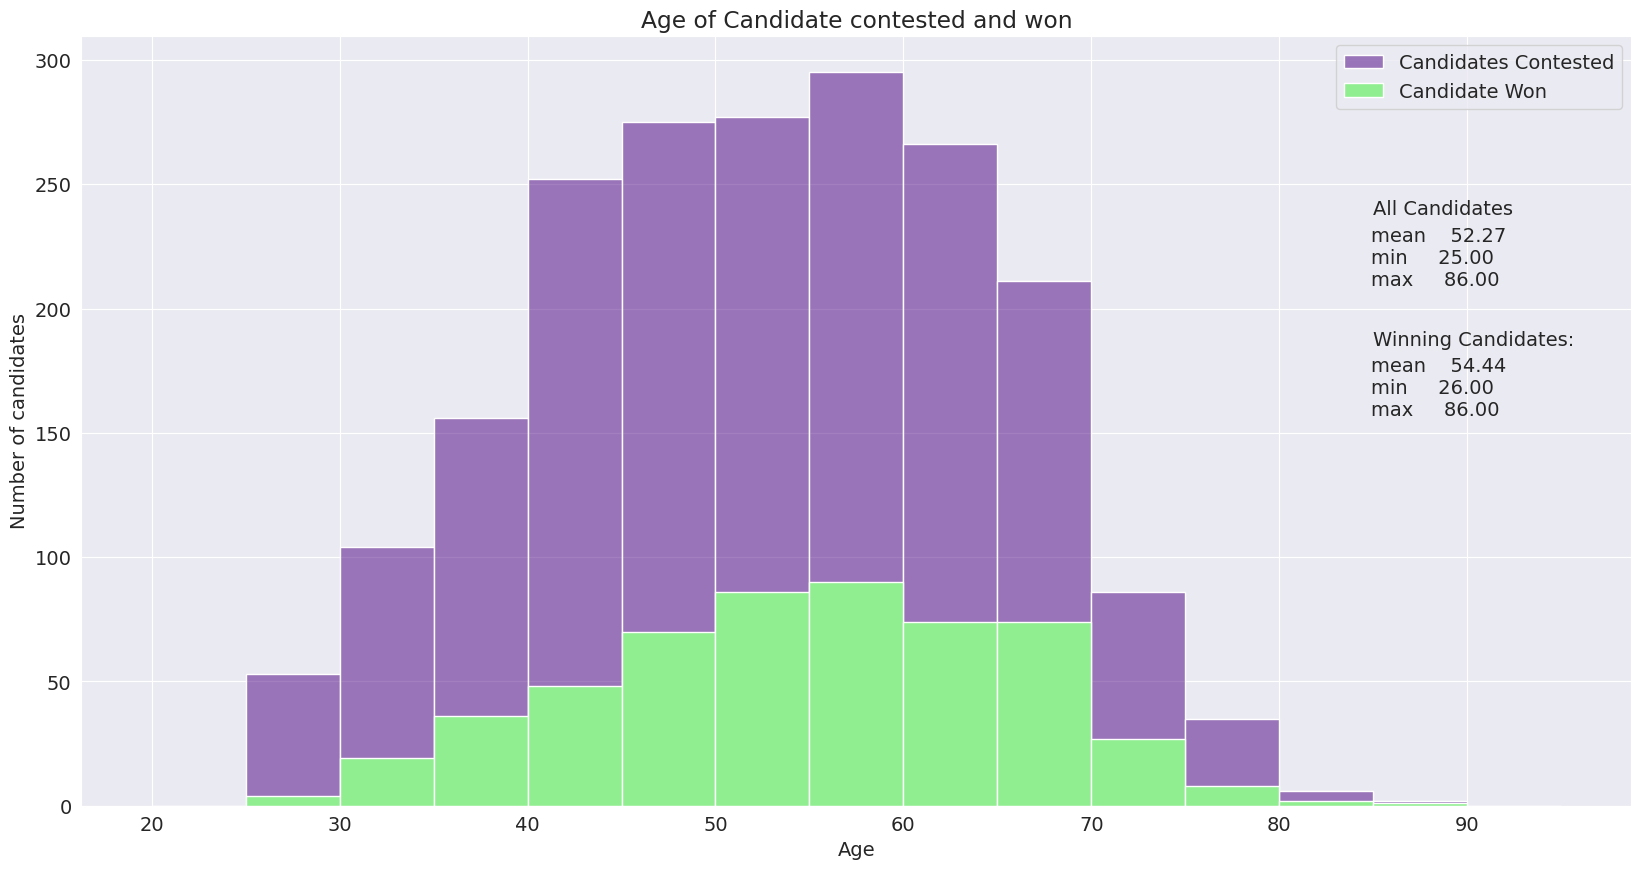

In [28]:
plt.figure(figsize = (20,10)) #for figsize
plt.title("Age of Candidate contested and won") #for title
plt.xlabel('Age') #for x axis label
plt.ylabel("Number of candidates") #for y axis label

sns.histplot(data = candidate_personal_df, x= 'AGE',bins = np.arange(20,100,5),color = 'indigo',alpha = 0.5) #histogram 
sns.histplot(data = winner_df, x= 'AGE',bins = np.arange(20,100,5),color ='lightgreen',alpha = 1) #histogram

plt.legend(['Candidates Contested','Candidate Won']) #for legend

plt.text(85,238,"All Candidates") #marking
plt.figtext(0.77,0.63, round(candidate_personal_df.describe().AGE[['mean','min','max']],2).to_string())

plt.text(85,185,"Winning Candidates:")
plt.figtext(0.77,0.5, round(winner_df.describe().AGE[['mean','min','max']],2).to_string())


**Observation:**
1. The age group 55-60 have the maximum number of candidates followed closely by the age group 50-55.
2. The Average age of the House-54 years also lies in the above range.
3. Majority of the winners are between the age 45-70.

In [29]:
print("Oldest Member of the House:")
winner_df[(winner_df.AGE == 86)][["NAME", "PARTY", "STATE", "CONSTITUENCY"]].reset_index(drop = True)

Oldest Member of the House:


,NAME,PARTY,STATE,CONSTITUENCY
0,DR. SHAFIQUR REHMAN BARQ,SP,Uttar Pradesh,SAMBHAL


**Seat Category** : We can also calculate the seat distribution under special reservation.

<Axes: xlabel='CATEGORY', ylabel='Count'>

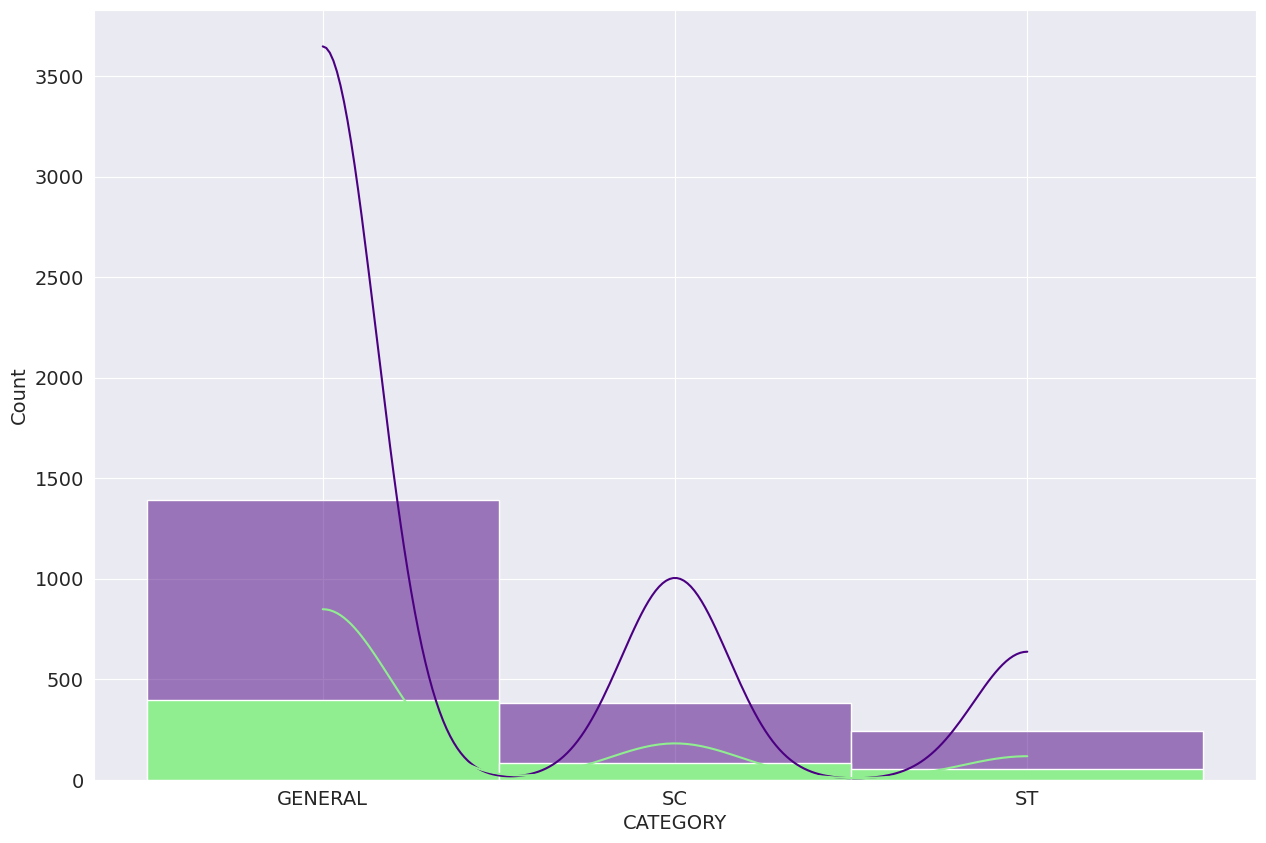

In [30]:
sns.histplot(data = candidate_personal_df, x= 'CATEGORY',bins = np.arange(0,50,10),color = 'indigo',alpha = 0.5,kde = True)
sns.histplot(data = winner_df, x= 'CATEGORY',bins = np.arange(0,50,10),color ='lightgreen',alpha = 1,kde = True)

In [31]:
print(df.shape) #original shape
print(candidate_df.shape) #after removing some columns
print(candidate_personal_df.shape) #after removing some rows(NOTA candidate)
print(winner_df.shape) #only have winner

(2263, 19)
(2263, 14)
(2018, 14)
(539, 13)


 **Coorelation - Ploting Heatmap**

<Axes: >

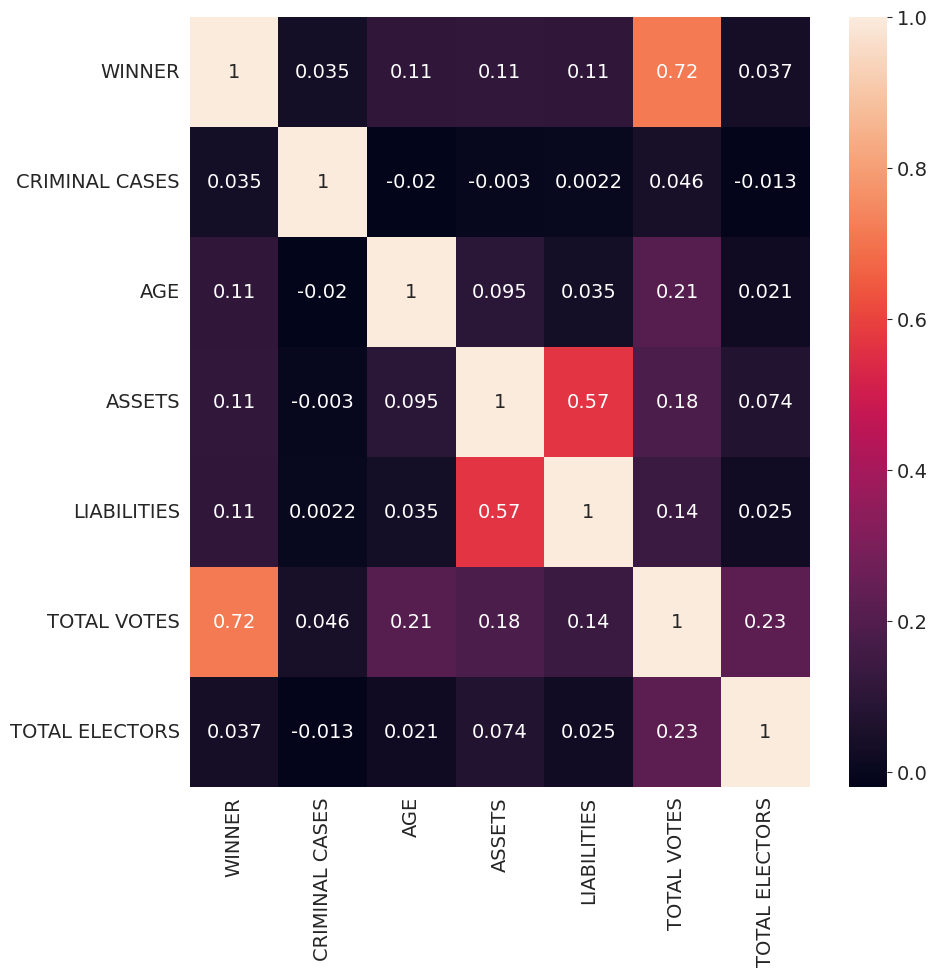

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(candidate_personal_df.corr(),annot = True)

We can also see the distribution of constituencies in each state over the contry for our better understanding.

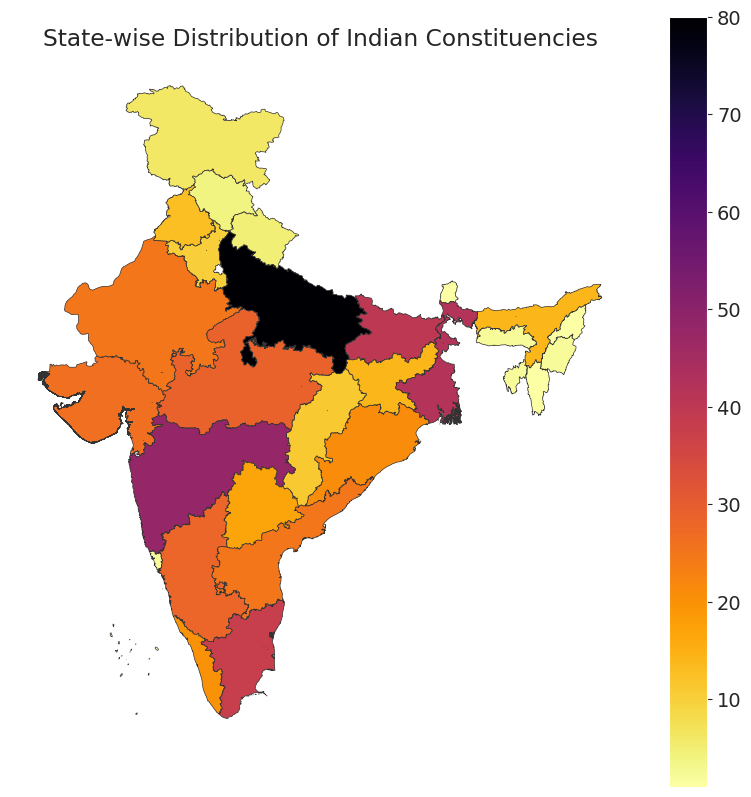

In [33]:
st = candidate_personal_df.groupby('STATE').apply(lambda x : x['CONSTITUENCY'].nunique()).reset_index(name = 'CONSTITUENCY') #grouping state 

shp_gdf = gpd.read_file('/kaggle/input/india-states/Igismap/Indian_States.shp')
merged = shp_gdf.set_index("st_nm").join(st.set_index('STATE'))

fig, ax = plt.subplots(1,figsize = (10,10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Constituencies')

fig = merged.plot(column = "CONSTITUENCY",cmap='inferno_r',
                  linewidth=0.5, ax=ax, edgecolor='0.2',legend=True )
st.sort_values(by='CONSTITUENCY',ascending=False,inplace=True)

fig2 = px.bar(st,x = 'STATE', y = 'CONSTITUENCY',color ='CONSTITUENCY',labels= {'pop':'Costituencies of India'})
fig2.update_layout(title_text ='Statewise distribution of constituencis all over India',template ='plotly_dark')
fig2.show()


**Observation:**
1. U.P has the most parliament seats of 80.
2. Nagaland,Puducherry,Mizoram,Dadra & Nagar Haveli,Sikkim,Chandigarh,Lakshdweep,Daman & Diu,Andaman & Nicobar Islands each contain 1 seats.

# Sunburst image of all states and constituencies
It can be use for better visulization

In [34]:
st_val = candidate_personal_df[['STATE','CONSTITUENCY','TOTAL ELECTORS']]
fig = px.sunburst(st_val,path = ['STATE','CONSTITUENCY'],values = 'TOTAL ELECTORS',color = 'TOTAL ELECTORS',color_continuous_scale = 'viridis_r')

fig.update_layout(title_text = 'Sunburst Image of States and Constituencies',template = 'plotly_dark')
fig.show()

**Gender Distribution** : Finding Gender Distribution of Participents.

In [35]:
req = pd.DataFrame(candidate_personal_df['GENDER'])
fig = px.pie(req,names ='GENDER')
fig.update_layout(title_text = 'Gender Distribution in Participent',template = 'plotly_dark')
fig.show()

 

**Gender Ratio** : Winning Gender Ratio vs Overall gender ratio

In [36]:
gen = candidate_personal_df.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name = 'COUNTS')
gen['CATEGORY']= "Overall gender ratio"

gen_win = winner_df.groupby('GENDER').apply(lambda x: x['NAME'].count()).reset_index(name='COUNTS')
gen_win['CATEGORY'] = "Winning gender ratio"

total = pd.concat([gen_win,gen])

fig = px.bar(total,x = 'GENDER', y= 'COUNTS',color = 'CATEGORY',barmode ='group')
fig.update_layout(title_text='Participation vs Win counts', template = 'plotly_dark')

fig.show()

**Political Parties Participation** in terms of states and number of constituencies

In [37]:
party_state = candidate_personal_df.groupby('PARTY')['STATE'].nunique().reset_index(name='STATE')
party_const = candidate_personal_df.groupby('PARTY')['CONSTITUENCY'].count().reset_index(name='CONSTITUENCY')
top_const = party_const.sort_values(by = 'CONSTITUENCY',ascending = False)[:25]

top_party = pd.merge(top_const,party_state,how ='inner',left_on='PARTY',right_on ='PARTY')
fig = px.scatter(top_party,x = 'CONSTITUENCY',y ='STATE',color ='STATE',size = 'CONSTITUENCY',hover_data = ['PARTY'])

fig.update_layout(title_text ='Political parties participation', template = 'plotly_dark')
fig.show()


1Each party's Statewise performance report in 2019 elction.

Text(0.5, 1.0, 'Statewise report card for the political parties')

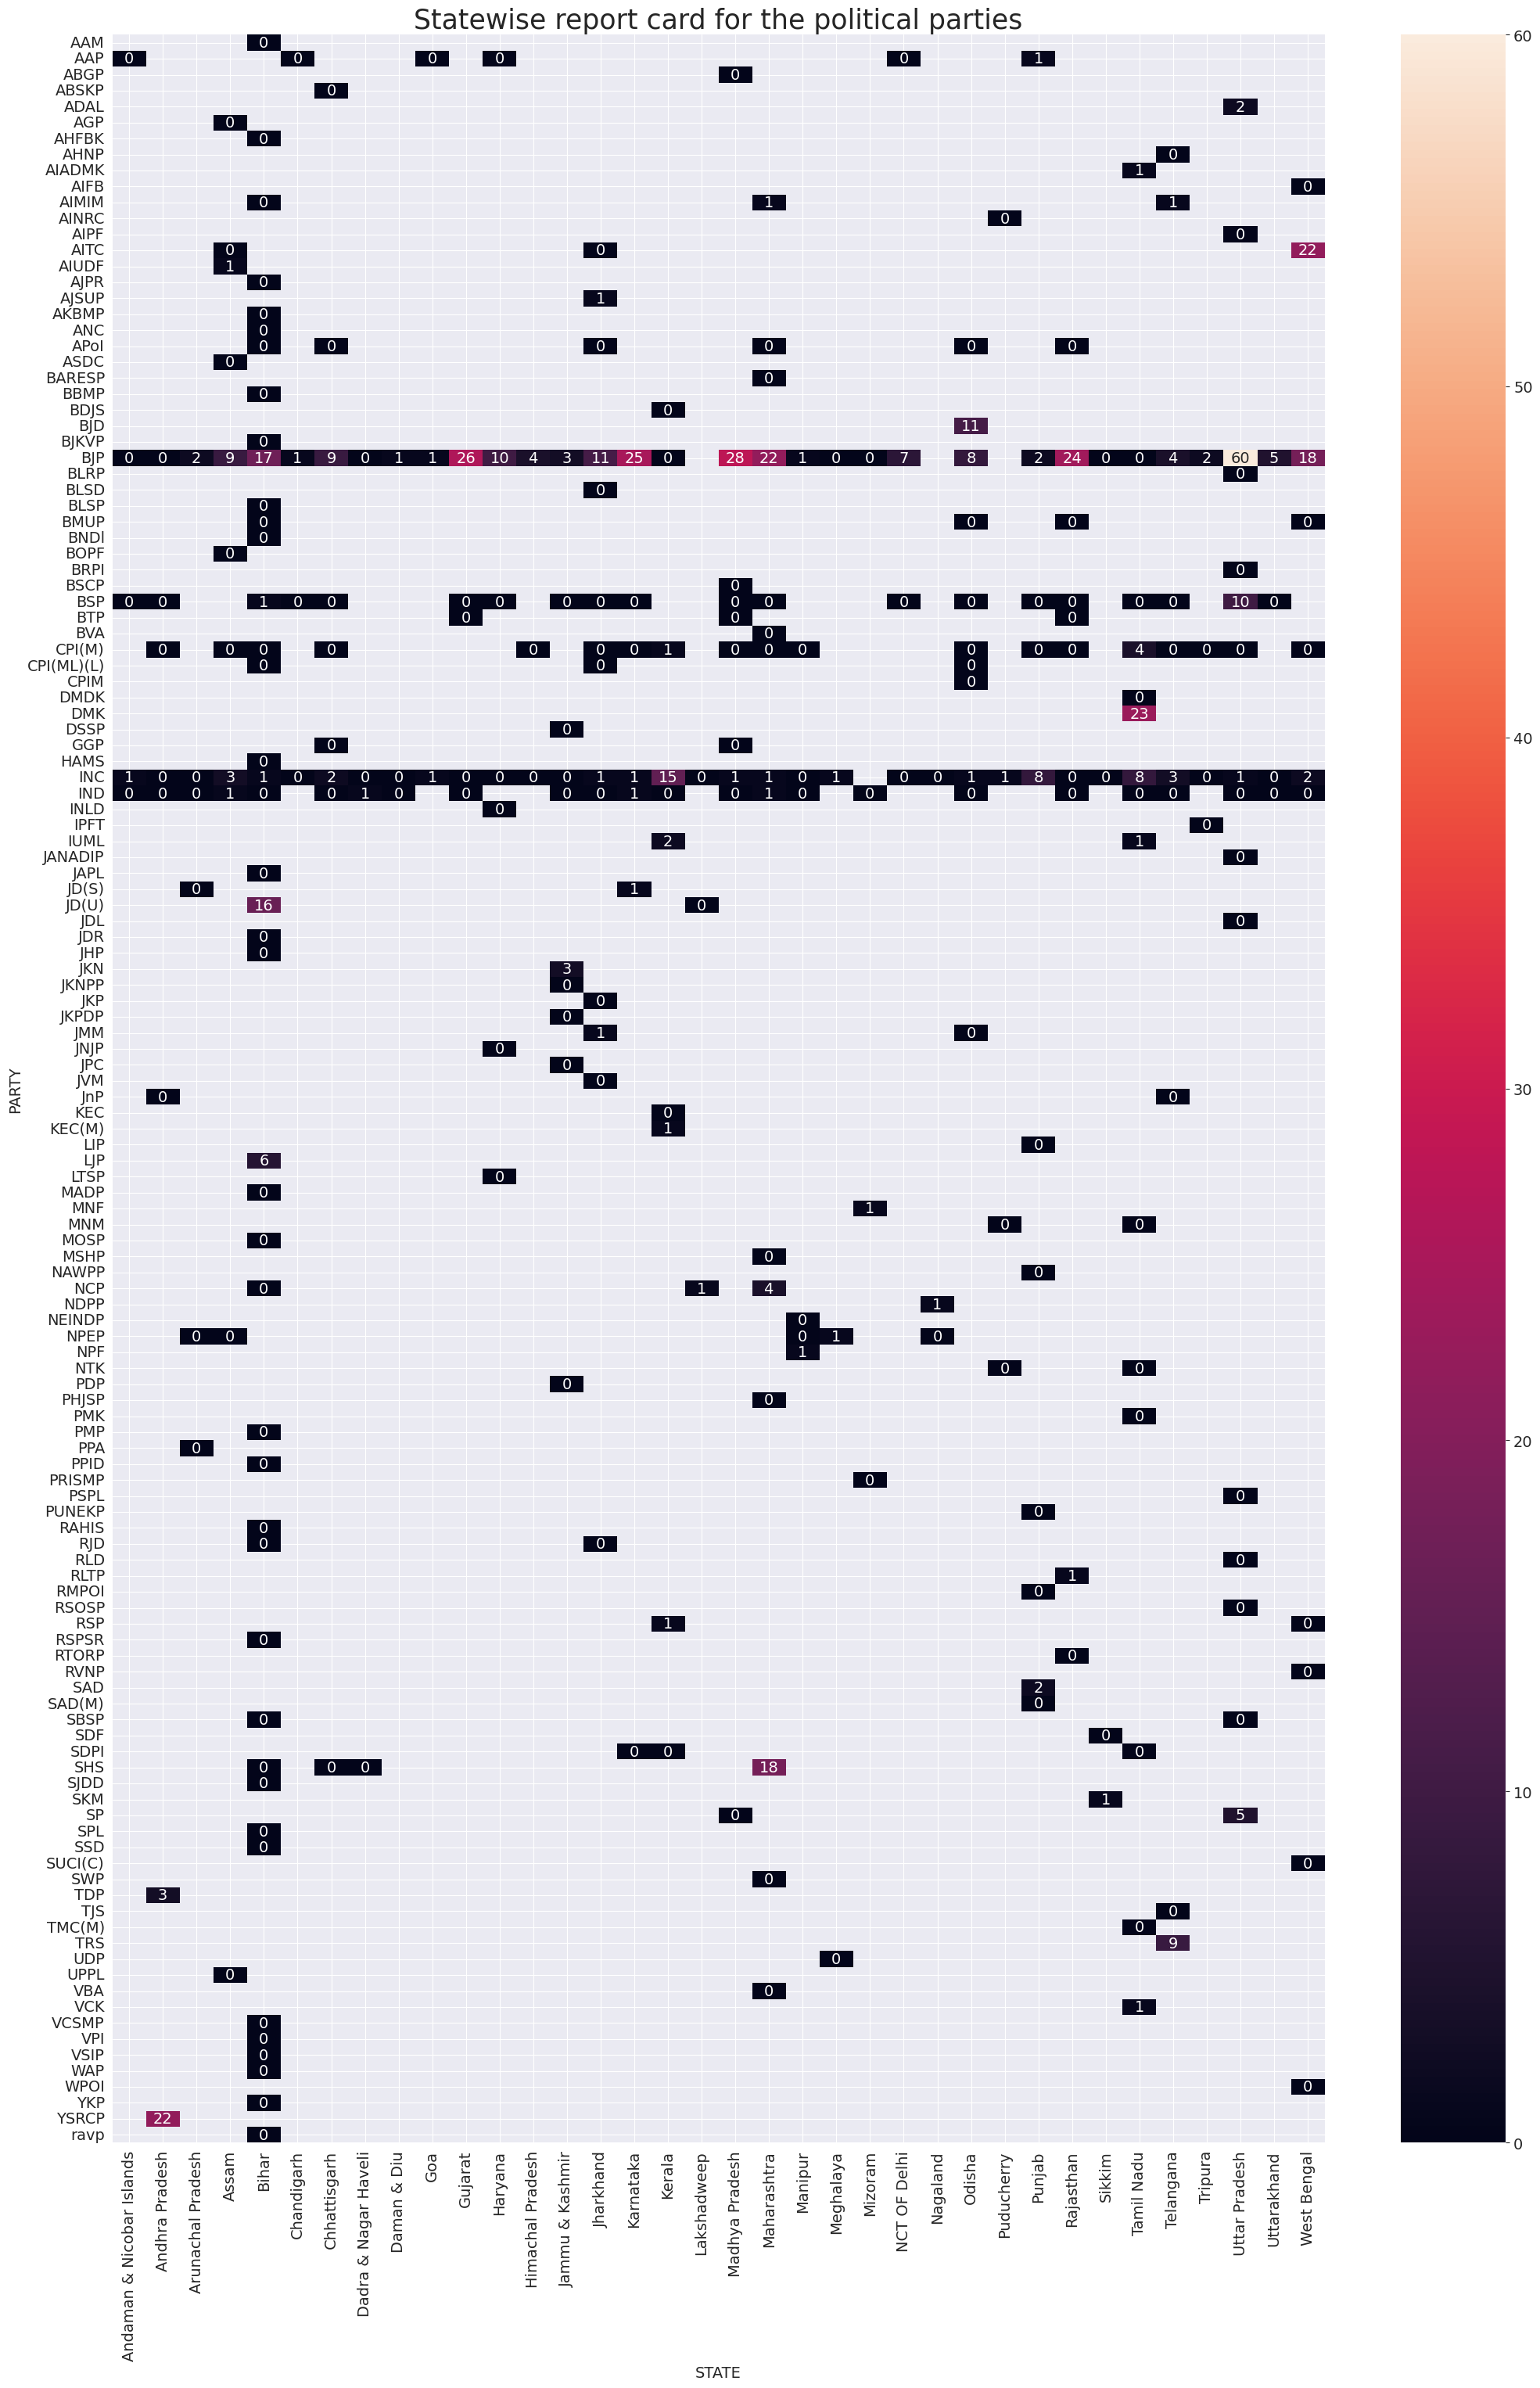

In [38]:
st_party= candidate_personal_df.groupby(['PARTY','STATE'])['WINNER'].sum().reset_index(name='WINS')
pivot_st_party = pd.pivot(st_party,index='PARTY',columns='STATE',values ='WINS')

plt.figure(figsize =(25,35))
sns.heatmap(pivot_st_party,annot=True,fmt='g')
plt.xlabel('STATE')
plt.ylabel('PARTY')

plt.title('Statewise report card for the political parties',size = 25)

Sum of criminal cases of candidates  of each parties.

In [39]:
winners1=winner_df[winner_df['CRIMINAL CASES']!=0]
winners0=winner_df[winner_df['CRIMINAL CASES']==0]

winners_cri=winners1.groupby('PARTY')['NAME'].count().reset_index(name ='CANDIDATES')
winners_no_cri=winners0.groupby('PARTY')['NAME'].count().reset_index(name ='CANDIDATES')

winners_cri['STATUS']='pending_case'
winners_no_cri['STATUS']='no_pending_case'

final_winners=pd.concat([winners_no_cri,winners_cri])

fig = px.bar(final_winners,x ='PARTY',y= 'CANDIDATES',color ='STATUS')
fig.update_layout(title_text ='WInner with criminal cases vs no criminal cases in parties', template = 'plotly_dark')
fig.show()

Relationship between Age & Gender

In [40]:
age_cnt = candidate_personal_df.groupby(['AGE','GENDER'])['NAME'].count().reset_index(name ='COUNTS')

fig = px.histogram(age_cnt,x='AGE',y='COUNTS',color='GENDER',marginal ='violin')

fig.update_layout(title_text ='Age counts distribution among the candidates',template ='plotly_dark')
fig.show()

**Observation:**
1. Age of male candidates from 50-59 and for female candidate it is 40-49 has the highest count.
2. Average age of male candidates is 55 and for female candidates it is 50.
3. Maximum age of male candiate is 86 and maximun age female candidate is 81

13. Average age of candidates from large parties

In [41]:
pt_avg_age = candidate_personal_df.groupby('PARTY')['AGE'].mean().round().reset_index(name='avg_age')
final_avg_age=pd.merge(top_party['PARTY'],pt_avg_age,how ='inner',left_on ='PARTY',right_on='PARTY')

final_avg_age = final_avg_age.sort_values(by = 'avg_age',ascending = False)

plt.figure(figsize =(15,10))
fig = px.bar(final_avg_age,x ='PARTY',y='avg_age',color ='avg_age')

fig.update_layout(title_text = 'Average age of candidate in each party', template = 'plotly_dark')

fig.show()

<Figure size 1500x1000 with 0 Axes>

In [42]:
print('Average age of contested Mps is',candidate_personal_df['AGE'].mean().round())

Average age of contested Mps is 52.0


Average age of candidates of party in the house affter winning elction.

In [43]:
pt_avg_age = winner_df.groupby('PARTY')['AGE'].mean().round().reset_index(name='avg_age')
final_avg_age=pd.merge(top_party['PARTY'],pt_avg_age,how ='inner',left_on ='PARTY',right_on='PARTY')

final_avg_age = final_avg_age.sort_values(by = 'avg_age',ascending = False)

plt.figure(figsize =(15,10))
fig = px.bar(final_avg_age,x ='PARTY',y='avg_age',color ='avg_age')

fig.update_layout(title_text = 'Average age of candidate in each party in the house', template = 'plotly_dark')

fig.show()

<Figure size 1500x1000 with 0 Axes>

In [44]:
print('Average age of Mps in the house is',winner_df['AGE'].mean().round())

Average age of Mps in the house is 54.0


Ratio between participatant and winner on the bases of categories.

In [45]:
cat = candidate_personal_df.groupby('CATEGORY')['NAME'].count().reset_index(name='COUNTS')
cat['Status']="Overall Category ratio"

cat_win =winner_df.groupby('CATEGORY')['NAME'].count().reset_index(name ='COUNTS')
cat_win['Status'] = "Winner Category ratio"

total =pd.concat([cat_win,cat])

fig=px.bar(total,x='CATEGORY',y = 'COUNTS',color = 'Status',barmode ='group')
fig.update_layout(title_text = "Participation vs Win",template ='plotly_dark')

fig.show()

Assets vs liabilities among winning Candidates

In [46]:
fig = plt.figure(figsize =(20,15))
win_as_liab=candidate_personal_df.sort_values(by='ASSETS',ascending=False)
fig=px.scatter(win_as_liab,x='ASSETS',y='LIABILITIES'
               ,color='STATE',
               size='ASSETS',
               hover_data=(['NAME','PARTY','CONSTITUENCY','STATE','WINNER']),
                 title='Assets vs Liabilities for the Winning Politicians')
fig.update_layout(title_text='Assets vs Liabilities for the Winning Politicians',template='plotly_dark')
fig.show()

<Figure size 2000x1500 with 0 Axes>